# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
df1 = pd.read_csv("ad_data.csv")
df2 = pd.read_csv("customer_data.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   ad_type           10000 non-null  object
 2   ad_medium         10000 non-null  object
 3   ad_response       10000 non-null  bool  
 4   items_purchased   10000 non-null  object
 5   drinks_purchased  10000 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 400.5+ KB


In [2]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [3]:
df = pd.merge(df1, df2, on='customer_id', how='inner')

In [4]:
df

,customer_id,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,state,sex,age,occupation,family_size,income
0,3226,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd...",CA,M,30.0,Government,5,62303
1,5217,DISCOUNT-50%,15 sec YouTube ad,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']",OH,M,36.0,Retail,1,39638
2,5247,REWARD - Free Garlic Steak Nacho Fries with pu...,15 sec YouTube ad,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']",WV,M,31.0,IT,1,112766
3,7793,DISCOUNT-5%,30 sec Hulu commercial,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']",MI,F,57.0,Government,2,137374
4,5759,DISCOUNT-50%,15 sec YouTube ad,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']",RI,M,22.0,Education,1,41748
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,904,BOGO - Baja Blast,15 sec TikTok ad,False,['steak garlic nacho fries'],['mountain dew'],CA,F,27.0,Government,0,56754
9996,8731,DISCOUNT-5%,Static Facebook ad,False,"['crunchwrap supreme', 'spicy potato soft taco...","['mountain dew', 'brisk', 'starry', 'baja blast']",MI,M,44.0,Retail,3,47341
9997,7396,DISCOUNT-10%,15 sec TikTok ad,False,['steak garlic nacho fries'],['gatorade'],UT,M,26.0,Healthcare,0,77525
9998,8559,DISCOUNT-10%,30 sec cable TV ad,False,"['cinnamon twists', 'mexican pizza', 'cinnamon...","['gatorade', 'mug root beer', 'iced tea', 'ice...",FL,F,67.0,Retired,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   ad_type           10000 non-null  object 
 2   ad_medium         10000 non-null  object 
 3   ad_response       10000 non-null  bool   
 4   items_purchased   10000 non-null  object 
 5   drinks_purchased  10000 non-null  object 
 6   state             10000 non-null  object 
 7   sex               10000 non-null  object 
 8   age               10000 non-null  float64
 9   occupation        10000 non-null  object 
 10  family_size       10000 non-null  int64  
 11  income            10000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 947.3+ KB


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [6]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data = numeric_data.fillna(numeric_data.mean())
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

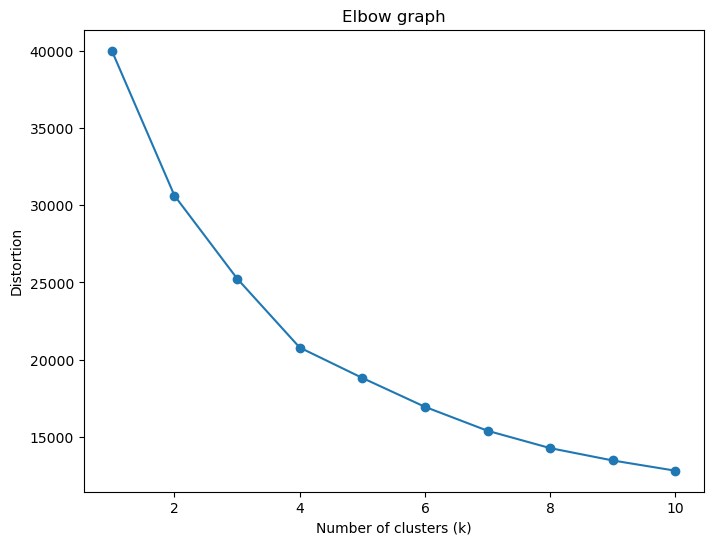

In [7]:
distortions = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to cluster center

plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [8]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_data)

# Add the cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_
print(df.head())

   customer_id                                            ad_type  \
0         3226                    BOGO - Garlic Steak Nacho Fries   
1         5217                                       DISCOUNT-50%   
2         5247  REWARD - Free Garlic Steak Nacho Fries with pu...   
3         7793                                        DISCOUNT-5%   
4         5759                                       DISCOUNT-50%   

                ad_medium  ad_response  \
0       15 sec YouTube ad         True   
1       15 sec YouTube ad        False   
2       15 sec YouTube ad         True   
3  30 sec Hulu commercial        False   
4       15 sec YouTube ad        False   

                                     items_purchased  \
0  ['steak garlic nacho fries', 'steak garlic nac...   
1   ['crunchy taco', 'cheesy bean and rice burrito']   
2  ['steak garlic nacho fries', 'cheesy gordita c...   
3  ['crunchwrap supreme', 'cravings box', 'crunch...   
4              ['nachos bellgrande', 'crunchy taco']

#### Don't forget to describe the centers of the clusters you found.

### Cluster 1: Middle aged people who are upper-middle class
### Cluster 3: Old adults who are upper class

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [9]:
# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.